In [1]:
%%bash
!(stat -t /usr/local/lib/*/dist-packages/google/colab > /dev/null 2>&1) && exit
rm -rf hw2
git clone https://github.com/mit-6864/hw2.git

Cloning into 'hw2'...


In [2]:
import sys
sys.path.append("/content/hw2")

import csv
import itertools as it
import numpy as np
import sklearn.decomposition
from tqdm import tqdm
import lab_util
import random

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount='True')

Mounted at /content/drive


In [4]:
!pip install langdetect

In [5]:
!pip install --upgrade gensim

In [6]:
from langdetect import detect
import re

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def clean_csv(csv_file):
  with open(csv_file) as reader:
    csvreader = csv.reader(reader)
    next(csvreader)
    rows = list(csvreader)
    random_tweets = random.sample(rows, 3000)

  sampling_pool = []
  for row in random_tweets:
    try:
      if len(row) >= 3 and detect(row[2]) == 'en':
        sampling_pool.append(row)
    except:
      pass

  sampling_pool = random.sample(sampling_pool, 600)
  cleaned_samples = []
  for sample in sampling_pool:
    split_tweet = sample[2].split()
    cleaned_words = []
    for word in split_tweet:
      if 'https:' not in word and '@' not in word and (word.isalpha() or word[0] == '#'):
        if not word.lower() in ['#joebiden', '#trump2020', '#biden2020', '#donaldtrump', '#auspol', '#ausvotes', '#ausvotes19', '#ausvote19', '#ausvote2019','#ausvotes2019','#trump', '#biden', '#donaldjtrump']:
          cleaned_words.append(remove_emojis(word))
    cleaned_samples.append((' '.join(cleaned_words), 1))
  return cleaned_samples

In [7]:
cleaned_joe = clean_csv('/content/drive/MyDrive/NLP-Political-Polarity/hashtag_joebiden.csv')
cleaned_donald = clean_csv('/content/drive/MyDrive/NLP-Political-Polarity/hashtag_donaldtrump.csv')
cleaned_aus = clean_csv('/content/drive/MyDrive/NLP-Political-Polarity/auspol2019.csv')

In [ ]:
print(cleaned_joe[284])
print(cleaned_donald[:5])
print(cleaned_aus[:5])

('#Joe and Kamala #Harris are not the #radical #left. They are #sensible #moderate #patriots. #GOP are radical #fascists.', 1)
[('which President is going to help #Artsakh that is the major ACT #RecognizeArtsakh #PeaceforArmenians', 1), ('THIS REALLY SUMS UP I KNOW IF A RACIST OR NOT BUT ONE THING FOR SURE IS A #DAVIDLETTERMAN #HOLLABLOCK Reposted from #TeamDL #agedlikefinewine', 1), ('seen three different Biden commercials today all three with different sets of black people conversing bashing When will black Americans realize being used by and the Democrats #wakeup #2020Elections #Elections2020', 1), ('by far not a huge #Biden-supporter and only consider him to be the lesser evil but at least it will be funny to watch the meltdown of #Trump-supporters on because #RedMirage is unfortunately still election day when it becomes obvious that Trump', 1), ('I knew supporters were really but this proves it beyond a These #Trumpers are protesting counting in MaricopaCounty in which is actually

In [8]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

dataset = load_dataset("tweet_eval", "irony")

Extracting data files:   0%|          | 0/6 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/2862 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/784 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/955 [00:00<?, ? examples/s]

In [ ]:
sampling_pool = random.sample(dataset['train']['text'], 1800)
cleaned_samples_nonpolitical = []
for sample in sampling_pool:
  sample = remove_emojis(sample)
  split_tweet = sample.split()
  # print(split_tweet)
  cleaned_words = []
  for word in split_tweet:
    word = word.replace('.','')
    if 'https:' not in word and '@' not in word and len(word) >= 3 and (word.isalpha() or word[0] == '#'):
      cleaned_words.append(remove_emojis(word))
  cleaned_samples_nonpolitical.append((' '.join(cleaned_words), 0))

In [ ]:
# cleaned_scrape = []
# with open('./tweets.csv') as reader:
#   csvreader = csv.reader(reader)
#   next(csvreader)
#   rows = list(csvreader)
#   for row in rows:
#     label = int(row[2])
#     split_tweet = row[3].split()
#     cleaned_words = []
#     for word in split_tweet:
#       if 'http' not in word and '@' not in word:  #and (word.isalpha() or word[0] == '#') and len(word) >=2:
#         cleaned_words.append(remove_emojis(word))
#     cleaned_scrape.append((' '.join(cleaned_words), label))

In [ ]:
cleaned_data = cleaned_joe.copy()
cleaned_data.extend(cleaned_donald)
cleaned_data.extend(cleaned_samples_nonpolitical)
# cleaned_data.extend(cleaned_scrape)
cleaned_data.extend(cleaned_aus)
np.random.seed(0)
np.random.shuffle(cleaned_data)
tweets, labels = zip(*cleaned_data)

# free up memory
del cleaned_joe
del cleaned_donald
del cleaned_samples_nonpolitical
del cleaned_aus

In [ ]:
print(len(tweets))

3600


In [ ]:
train_tweets, train_labels = tweets[:2800], labels[:2800]
val_tweets, val_labels = tweets[2800:3200], labels[2800:3200]
test_tweets, test_labels = tweets[3200:], labels[3200:]

In [ ]:
def remove_empty(tweet, label):
  new_tweets = []
  new_labels = []
  for i in range(len(tweet)):
    if len(tweet[i]):
      new_tweets.append(tweet[i])
      new_labels.append(label[i])
  return new_tweets, new_labels

In [ ]:
train_tweets, train_labels = remove_empty(train_tweets, train_labels)
val_tweets, val_labels = remove_empty(val_tweets, val_labels)
test_tweets, test_labels = remove_empty(test_tweets, test_labels)

In [ ]:
print(len(train_tweets))

2794


In [ ]:
# import numpy as np
# import re
# import string
# import random

# def show_similar_words(tokenizer, reps, tokens):
#     reps = reps / (np.sqrt((reps ** 2).sum(axis=1, keepdims=True)))
#     #for i, (word, token) in enumerate(tokenizer.word_to_token.items()):
#     for token in tokens:
#         word = tokenizer.token_to_word[token]
#         rep = reps[token, :]
#         sims = ((reps - rep) ** 2).sum(axis=1)
#         nearest = np.argsort(sims)
#         print(word, token)
#         for j in nearest[1:6]:
#             print(" ", tokenizer.token_to_word[j], "%.3f" % sims[j])

# class Tokenizer:
#   def __init__(self, min_occur=1):
#     self.word_to_token = {}
#     self.token_to_word = {}
#     self.word_count = {}

#     self.word_to_token['pad'] = 0
#     self.token_to_word[0] = 'pad'
#     self.word_to_token['<unk>'] = 1
#     self.token_to_word[1] = '<unk>'
#     self.word_to_token['<s>'] = 2
#     self.token_to_word[2] = '<s>'
#     self.word_to_token['</s>'] = 3
#     self.token_to_word[3] = '</s>'
#     self.vocab_size = 4

#     self.min_occur = min_occur

#   def fit(self, corpus):
#     for review in corpus:
#       review = review.strip().lower()
#       words = re.findall(r"[a-zA-Z_0-9|#']+|[.,!?;]", review)
#       for word in words:
#           if len(word) > 2:
#             if word not in self.word_count:
#                 self.word_count[word] = 0
#             self.word_count[word] += 1

#     for review in corpus:
#       review = review.strip().lower()
#       words = re.findall(r"[a-zA-Z_0-9|#']+|[.,!?;]", review)
#       for word in words:
#         if len(word) > 2:
#           if self.word_count[word] < self.min_occur:
#             continue
#           if word in self.word_to_token:
#             continue
#           self.word_to_token[word] = self.vocab_size
#           self.token_to_word[self.vocab_size] = word
#           self.vocab_size += 1

#   def tokenize(self, corpus):
#     tokenized_corpus = []
#     for review in corpus:
#       review = review.strip().lower()
#       words = re.findall(r"[a-zA-Z_0-9|#']+|[.,!?;]", review)
#       tokenized_review = []
#       for word in words:
#         if word not in self.word_to_token:
#           tokenized_review.append(0)
#         else:
#           tokenized_review.append(self.word_to_token[word])
#       tokenized_corpus.append(tokenized_review)
#     return tokenized_corpus

#   def de_tokenize(self, tokenized_corpus):
#     corpus = []
#     for tokenized_review in tokenized_corpus:
#       review = []
#       for token in tokenized_review:
#         review.append(self.token_to_word[token])
#       corpus.append(" ".join(review))
#     return corpus


# class CountVectorizer:
#   def __init__(self, min_occur=1):
#     self.tokenizer = Tokenizer(min_occur)

#   def fit(self, corpus):
#     self.tokenizer.fit(corpus)

#   def transform(self, corpus):
#     n = len(corpus)
#     X = np.zeros((n, self.tokenizer.vocab_size))
#     print(X.shape)
#     for i, review in enumerate(corpus):
#       review = review.strip().lower()
#       words = re.findall(r"[a-zA-Z_0-9|#']+|[.,!?;]", review)
#       # print(review)
#       # print(words)
#       # print('------')
#       for word in words:
#         if word not in self.tokenizer.word_count or self.tokenizer.word_count[word] < self.tokenizer.min_occur:
#           X[i][0] += 1
#         else:
#           X[i][self.tokenizer.word_to_token[word]] += 1
#     return X

# def get_ngrams(tokenized_corpus, window_size, pad_idx=2006):
#     ngrams = []
#     for i, review in enumerate(tokenized_corpus):
#         for j, word in enumerate(review):
#             min_ind = max(0, j-window_size)
#             max_ind = min(len(review), j+window_size+1)
#             ctx = np.zeros(2 * window_size, dtype=np.int64) + pad_idx
#             for ik, k in enumerate(range(min_ind, j)):
#                 ctx[ik] = review[k]
#             for ik, k in enumerate(range(j+1, max_ind)):
#                 ctx[window_size+ik] = review[k]
#             ngrams.append((ctx, review[j]))
#     return ngrams


In [ ]:
# vectorizer = CountVectorizer()
# vectorizer.fit(train_tweets)
# bow_matrix = vectorizer.transform(train_tweets)
# print(f"BoW matrix is {bow_matrix.shape[0]} x {bow_matrix.shape[1]}")

(2795, 8726)
BoW matrix is 2795 x 8726


In [ ]:
# for i in range(bow_matrix.shape[0]):
#   if np.sum(bow_matrix[i]) == 0:
#     print(i,'0')
# print(bow_matrix[284].shape)

(8726,)


## Load Pre-trained Word2Vec

In [ ]:
pretrained_embeddings_file = '/content/drive/MyDrive/NLP-Political-Polarity/model/GoogleNews-vectors-negative300.bin'
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader

# model = gensim.downloader.load('glove-twitter-25')
vectors = KeyedVectors.load_word2vec_format(pretrained_embeddings_file, binary=True)

w2v = Word2Vec(vector_size=300, min_count=1, compute_loss=True)

# Add the pre-trained model vocabulary
w2v.build_vocab([list(vectors.key_to_index.keys())])

del vectors

w2v

In [ ]:
# Load the pre-trained models embeddings
# note: if a word doesn't exist in the pre-trained vocabulary then it is left as is in the original model
w2v.wv.vectors_lockf = np.ones(len(w2v.wv), dtype=np.float32)
w2v.wv.intersect_word2vec_format(pretrained_embeddings_file, binary=True, lockf=0.0)

w2v

#### Finetune Word2Vec

In [ ]:
# Add vocabulary from tweets
def iter_sentences(tweets):
  """need to represent sentences as ['this' 'is', 'a', 'tweet']"""
  for tweet in tweets:
    yield tweet.split()

w2v.build_vocab(iter_sentences(train_tweets+val_tweets+test_tweets), update=True)
total_examples = w2v.corpus_count

In [ ]:
total_examples

3591

In [ ]:
# Train
w2v.train([tweet.split() for tweet in train_tweets], total_examples=total_examples, epochs=w2v.epochs, compute_loss=True)

In [ ]:
w2v.get_latest_training_loss()

In [ ]:
# Test embeddings
print(w2v.wv.key_to_index['#Harris'], w2v.wv.get_vector("#Harris")[:5])

3000062 [ 0.00309449 -0.00166406  0.00182293 -0.00188291  0.0021552 ]


In [ ]:
import sklearn.linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

"""
Model will take B x E matrix => prediction

data is just list of sentences in the form D x 1 => D x len(S). =>
"""
def train_model(featurizer, xs, ys, scale_factor = 1):
    xs_featurized = featurizer(xs, scale_factor)
    model = sklearn.linear_model.LogisticRegression(penalty='none', max_iter=1000)
    model.fit(xs_featurized, ys)
    return model

def eval_model(model, featurizer, xs, ys, scale_factor = 1):
    xs_featurized = featurizer(xs, scale_factor)

    if np.any(np.isnan(xs_featurized)):
      print('hi, nans found!')

    pred_ys = model.predict(xs_featurized)
    return (np.mean(pred_ys == ys), pred_ys)


def training_experiment(name, featurizer, n_train, scale_factor = 1):
    print(f"{name} features, {n_train} examples")
    train_xs = [tweet.split() for tweet in train_tweets[:n_train]]
    train_ys = train_labels[:n_train]
    test_xs = [tweet.split() for tweet in test_tweets]
    test_ys = test_labels

    model = train_model(featurizer, train_xs, train_ys, scale_factor)
    acc, pred = eval_model(model, featurizer, test_xs, test_ys, scale_factor)
    return acc, pred

In [ ]:
w2v.wv.get_vector('#Harris').shape

(300,)

In [ ]:
import torch
torch.FloatTensor(w2v.wv.vectors).shape

torch.Size([3004227, 300])

In [ ]:
torch.save(torch.FloatTensor(w2v.wv.vectors), "/content/drive/My Drive/word2vec.pt" )

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

def is_hashtag(word):
  return word[0] == '#'

def w2v_featurizer(xs, scale_factor):
    """D x len(s) => D x E"""
    batch, embed_dim = len(xs), w2v.vector_size

    feats = np.zeros((batch, embed_dim))

    for idx, tweet in enumerate(xs):
      total_embedding = np.zeros((embed_dim,))

      for word in tweet:

          if not word in w2v.wv:
            continue  # treat embedding as the 0 vector

          word_embedding = w2v.wv.get_vector(word)

          # Scale hashtag words
          if is_hashtag(word):
            word_embedding = scale_factor * word_embedding

          total_embedding += word_embedding

      feats[idx] = total_embedding

    # normalize
    feats = feats / np.sqrt((feats ** 2).sum(axis=1, keepdims=True))
    for i in range(len(feats)):
      if np.any(np.isnan(feats[i])):
        feats[i] = np.zeros(embed_dim)
    return feats

accs = []
precisions = []
recalls = []
f1 = []
preds_list = []
for factor in np.linspace(1, 10, num=19):
  print(f'======= Word2Vec Experiment w/ {factor=} =======')
  acc, preds = training_experiment("word2vec", w2v_featurizer, 240, scale_factor=factor)
  print(f'Accuracy: {acc:.2f}', '\n')
  accs.append(acc)
  precisions.append(precision_score(test_labels, preds))
  recalls.append(recall_score(test_labels, preds))
  f1.append(f1_score(test_labels, preds))
  preds_list.append(preds)

In [ ]:
print(accs[0], precisions[0], recalls[0], f1[0])
print(max(accs), max(precisions), max(recalls), max(f1))
print(f'max k: {np.argmax(accs)/2+1}')
print(f'max k precs: {np.argmax(precisions)/2+1}')
print(f'max k recs: {np.argmax(recalls)/2+1}')
print(f'max k f1s: {np.argmax(f1)/2+1}')

0.7994987468671679 0.7429906542056075 0.8641304347826086 0.7989949748743719
0.8020050125313283 0.7441860465116279 0.875 0.8020050125313284
max k: 1.5
max k precs: 1.5
max k recs: 9.0
max k f1s: 1.5


In [ ]:
def show_similar_words(reps, tokens):
    # reps = reps / (np.sqrt((reps ** 2).sum(axis=1, keepdims=True)))
    #for i, (word, token) in enumerate(tokenizer.word_to_token.items()):
    for token in tokens:
        word = w2v.wv.index_to_key[token]
        rep = reps[token, :]
        sims = ((reps - rep) ** 2).sum(axis=1)
        nearest = np.argsort(sims)
        print(word, token)
        for j in nearest[1:6]:
            print(" ", w2v.wv.index_to_key[j], "%.3f" % sims[j])

In [ ]:
w2v.wv.vectors

array([[ 4.51660156e-02, -4.51660156e-02, -3.93676758e-03, ...,
         7.95898438e-02,  7.22656250e-02,  1.30004883e-02],
       [-6.98242188e-02,  7.37304688e-02, -9.08203125e-02, ...,
        -2.47070312e-01,  1.07421875e-01, -2.17773438e-01],
       [ 1.17675781e-01,  2.94189453e-02, -1.31835938e-01, ...,
         1.87500000e-01, -1.23291016e-02, -7.12890625e-02],
       ...,
       [-1.29897636e-03, -2.28798832e-03, -5.22080634e-04, ...,
         2.72822264e-03, -2.57509557e-04,  8.49975331e-04],
       [-2.62248004e-03,  1.85319816e-03, -2.76960805e-03, ...,
        -2.46412354e-04, -1.39612949e-03,  1.34130556e-03],
       [ 8.73605022e-04,  7.97537970e-04,  1.99933373e-03, ...,
         2.36409833e-03, -9.40546219e-04, -1.86614122e-03]], dtype=float32)

In [ ]:
show_similar_words(w2v.wv.vectors, 5)

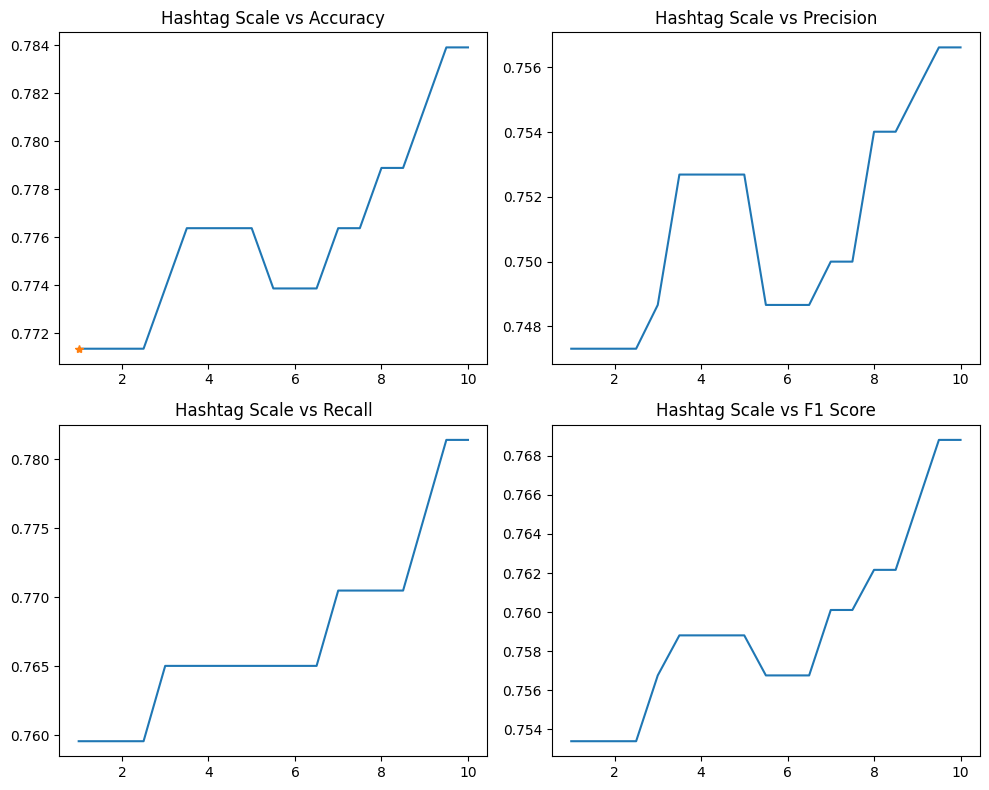

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot 1: Hashtag Scale vs Accuracy
axs[0, 0].set_title("Hashtag Scale vs Accuracy")
axs[0, 0].plot(np.linspace(1, 10, 19), accs)
axs[0, 0].plot(1, accs[0], '*')

# Plot 2: Hashtag Scale vs Precision
axs[0, 1].set_title("Hashtag Scale vs Precision")
axs[0, 1].plot(np.linspace(1, 10, 19), precisions)

# Plot 3: Hashtag Scale vs Recall
axs[1, 0].set_title("Hashtag Scale vs Recall")
axs[1, 0].plot(np.linspace(1, 10, 19), recalls)

# Plot 4: Hashtag Scale vs F1 Score
axs[1, 1].set_title("Hashtag Scale vs F1 Score")
axs[1, 1].plot(np.linspace(1, 10, 19), f1)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

#### Visualize Embedding Space

In [ ]:
!pip install umap-learn

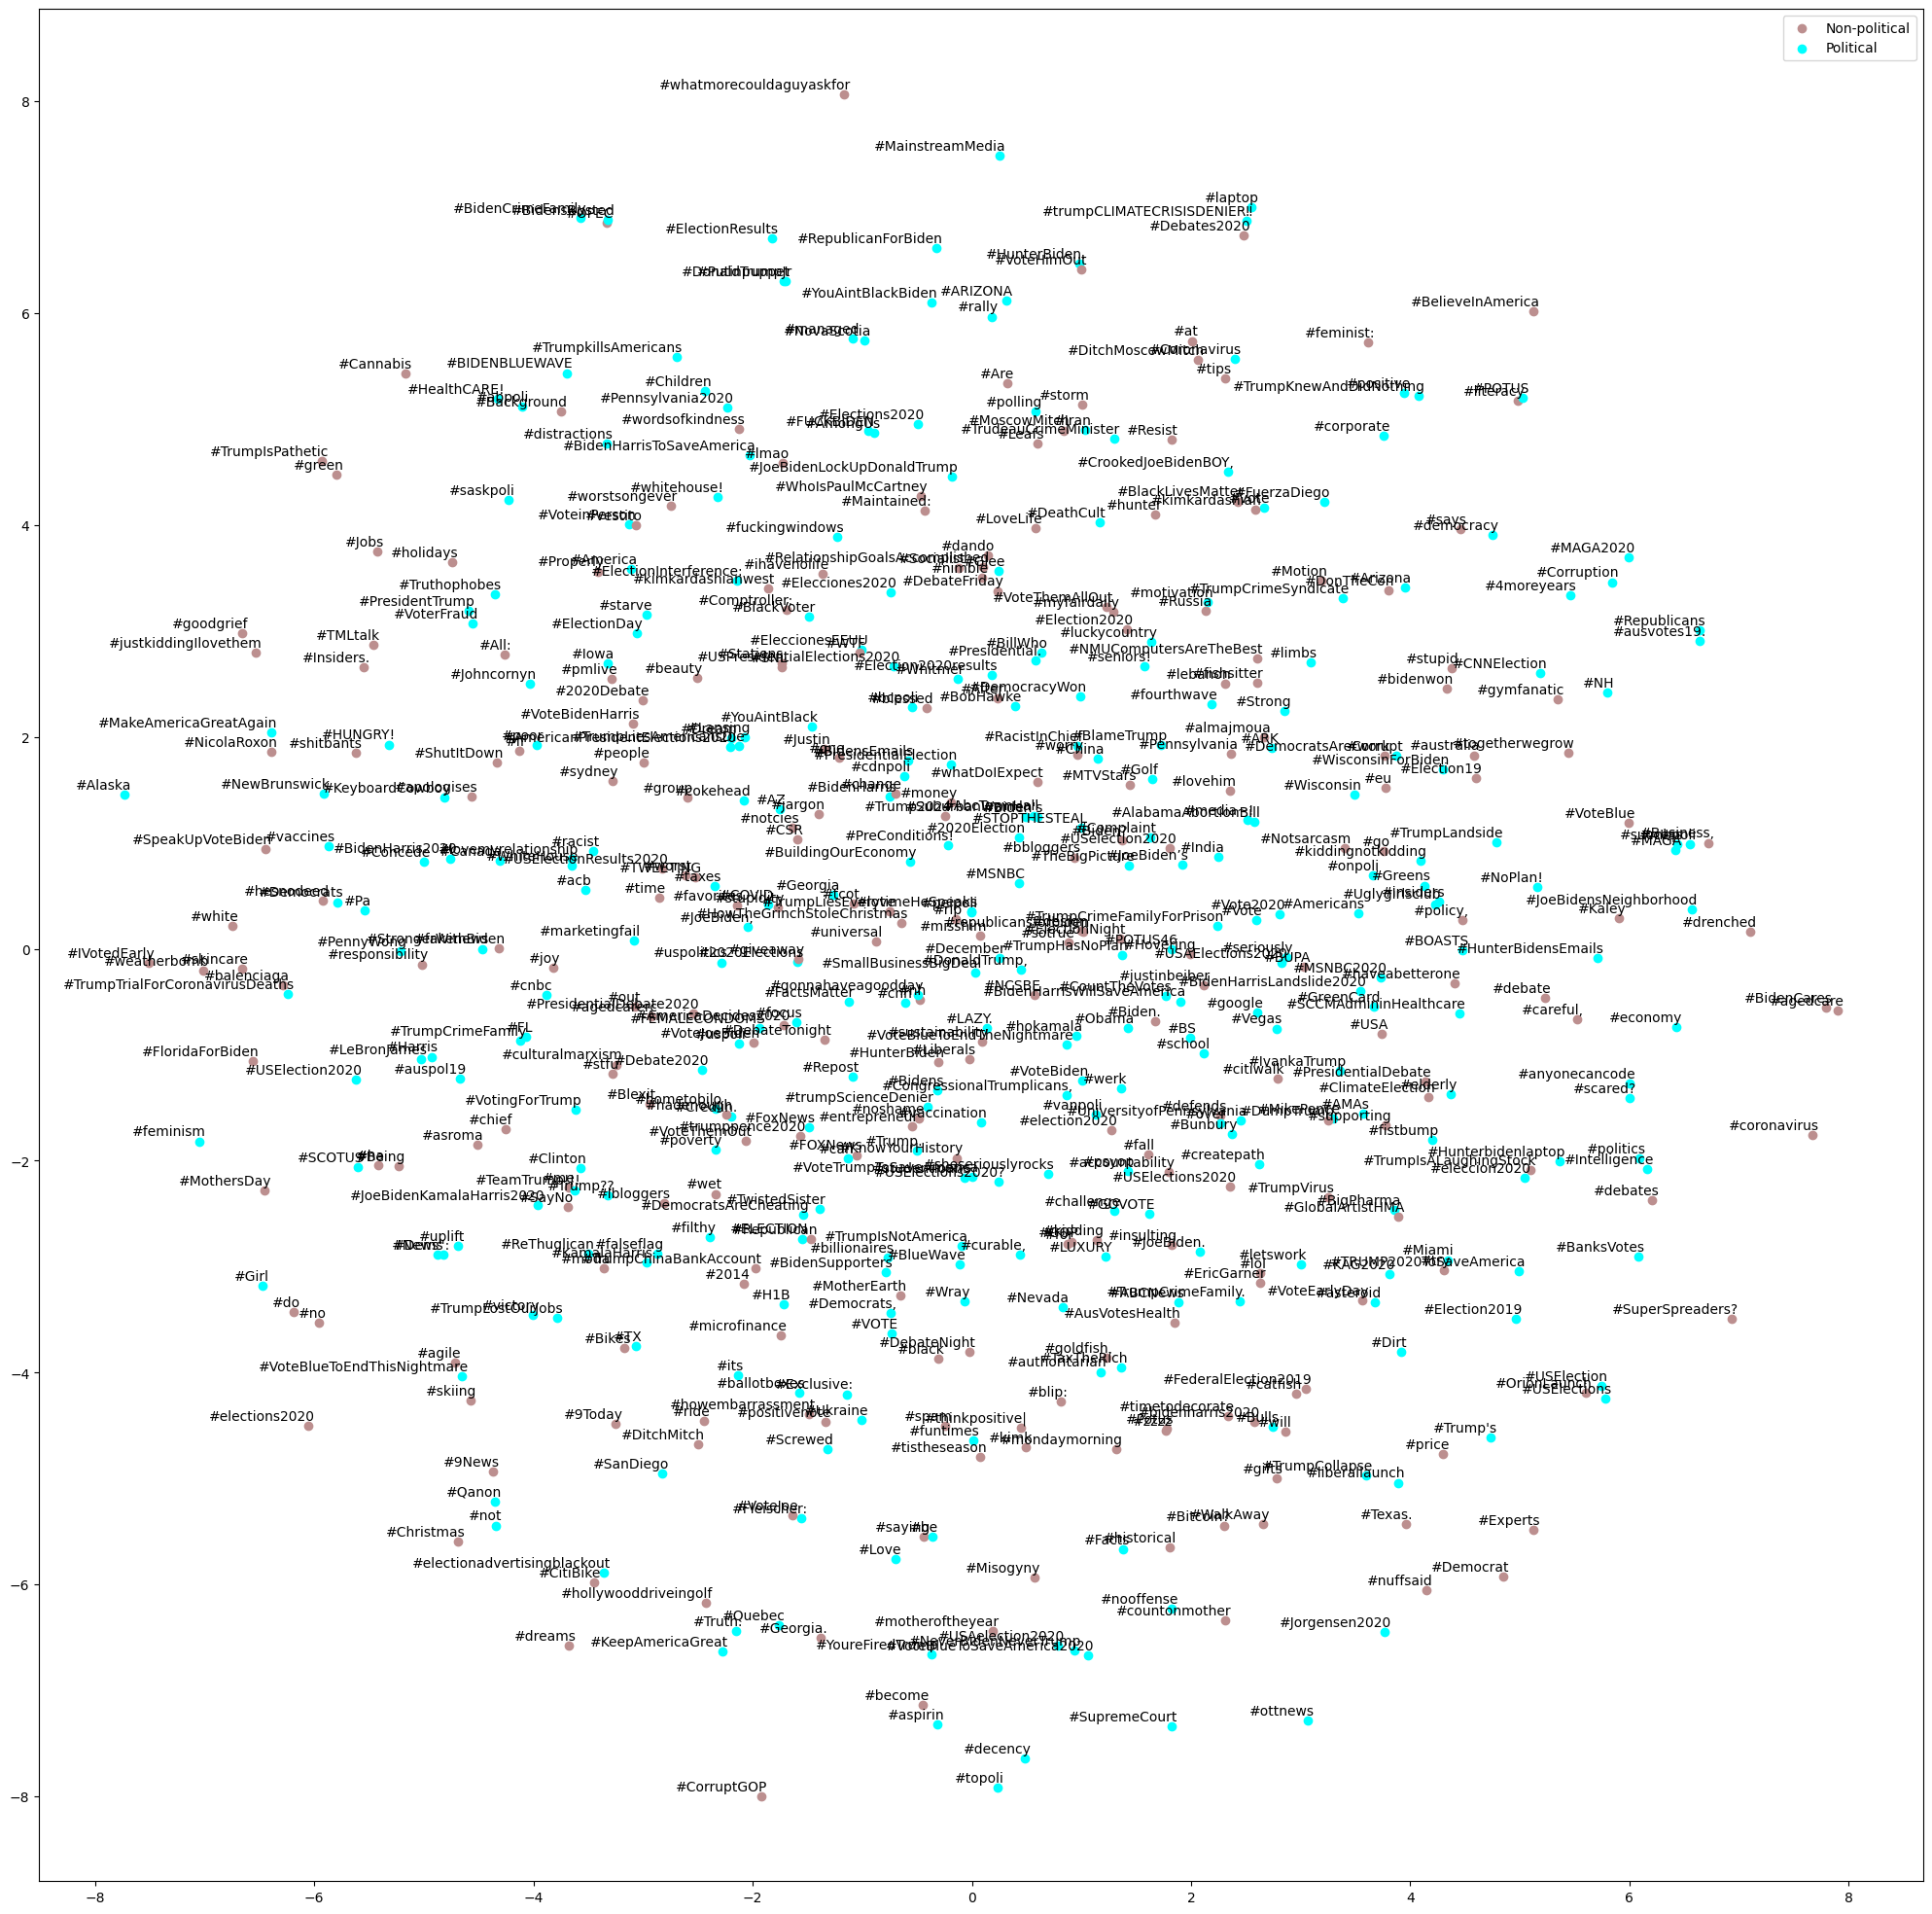

In [ ]:
######## Visualize ########
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

labels = []
embeddings = []
vals = []

for i in range(len(preds_list[0])):
  tweet = test_tweets[i]
  words = tweet.split()
  val = preds_list[0][i]
  for word in words:
    if word in w2v.wv and word not in labels and word[0]=='#' and '#' not in word[1:]:
      labels.append(word)
      embedding = w2v.wv.get_vector(word)
      embeddings.append(embedding)
      vals.append(val)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(np.array(embeddings))

x = []
y = []
colors = {
    0: 'rosybrown',
    1: 'cyan'
}
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(25, 25))
seen0 = False
seen1 = False
for i in range(len(x)):
    label = 'Political' if vals[i] else 'Non-political'
    if vals[i]:
      label = 'Political'
      if not seen0:
        plt.scatter(x[i],y[i],c=colors[vals[i]], label=label)
        seen0 = True
      else:
        plt.scatter(x[i],y[i],c=colors[vals[i]])
    else:
      label = 'Non-political'
      if not seen1:
        plt.scatter(x[i],y[i],c=colors[vals[i]], label=label)
        seen1 = True
      else:
        plt.scatter(x[i],y[i],c=colors[vals[i]])
    plt.annotate(labels[i],
                  xy=(x[i], y[i]),
                  xytext=(5, 2),
                  textcoords='offset points',
                  ha='right',
                  va='bottom')
plt.legend()
plt.show()

# xs = []
# ys = []
# for (x, y) in new_values:
#     xs.append(x)
#     ys.append(y)

# plt.figure(figsize=(16, 16))
# for i in range(len(xs)):
#     plt.scatter(xs[i],ys[i])
#     plt.annotate(labels[i],
#                   xy=(xs[i], ys[i]),
#                   xytext=(5, 2),
#                   textcoords='offset points',
#                   ha='right',
#                   va='bottom')
# plt.show()
# tsne_plot(model)

In [ ]:
print(len(vals), len(x))

565 565


## END OF EXPERIMENT

In [ ]:
# from sklearn.cluster import KMeans

# indices = KMeans(n_clusters=10).fit_predict(reps_word2vec)
# zipped = list(zip(range(vectorizer.tokenizer.vocab_size), indices))
# np.random.shuffle(zipped)
# zipped = zipped[:100]
# zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
# for token, cluster_idx in zipped:
#   word = vectorizer.tokenizer.token_to_word[token]
#   print(f"{word}: {cluster_idx}")

In [ ]:
from sklearn.manifold import TSNE

labels = []
tokens = []

for i in range(len(preds_list[0])):
  if preds_list[0][i] == 1:
    tweet = test_tweets[i]
    words = tweet.split()
    for word in words:
      if word in vectorizer.tokenizer.word_to_token and word not in labels and word[0]=='#':
        labels.append(word)
        j = vectorizer.tokenizer.word_to_token[word]
        tokens.append(reps_word2vec[j, :])

# for i in vectorizer.tokenizer.token_to_word:
#   tokens.append(reps_word2vec[i, :])
#   labels.append(vectorizer.tokenizer.token_to_word[i])

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(np.array(tokens))

In [ ]:
import matplotlib.pyplot as plt
x = []
y = []
colors = {
    0: 'rosybrown',
    1: 'cyan'
}
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(25, 25))
seen0 = False
seen1 = False
for i in range(len(x)):
    label = 'Political' if preds_list[0][i] else 'Non-political'
    if preds_list[0][i]:
      label = 'Political'
      if not seen0:
        plt.scatter(x[i],y[i],c=colors[preds_list[0][i]], label=label)
        seen0 = True
      else:
        plt.scatter(x[i],y[i],c=colors[preds_list[0][i]])
    else:
      label = 'Non-political'
      if not seen1:
        plt.scatter(x[i],y[i],c=colors[preds_list[0][i]], label=label)
        seen1 = True
      else:
        plt.scatter(x[i],y[i],c=colors[preds_list[0][i]])
    plt.annotate(labels[i],
                  xy=(x[i], y[i]),
                  xytext=(5, 2),
                  textcoords='offset points',
                  ha='right',
                  va='bottom')
plt.legend()
plt.show()